In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as ply
from sklearn.model_selection import TimeSeriesSplit
from fbprophet import Prophet
%matplotlib inline

In [2]:
df_actual = pd.read_csv("../write_data/Nashville.csv")
df_actual['time'] = pd.to_datetime(df_actual['time'])

In [3]:
df_fut = pd.read_csv("../write_data/Nashville_future.csv")
df_fut['ds'] = pd.to_datetime(df_fut['ds'])

In [4]:
zippies = df_fut.Zip_code.unique()

In [5]:
all_zips = pd.read_csv("../write_data/zillow_housing_zipcodes.csv")
all_zips['Date_index'] = pd.to_datetime(all_zips['Date_index'])
all_zips = all_zips.set_index('Date_index')

In [6]:
zippies_strings = ["%.0f" % number for number in zippies]

In [7]:
metro_zips = all_zips.filter(items=zippies_strings)

In [8]:
actual_mean = metro_zips.mean(axis=1)

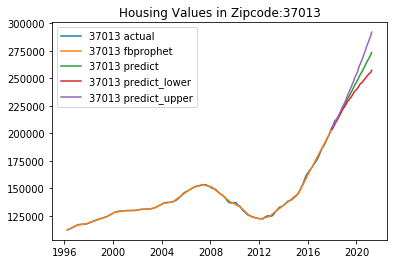

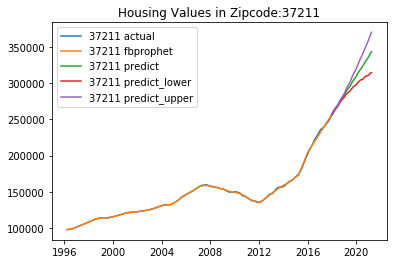

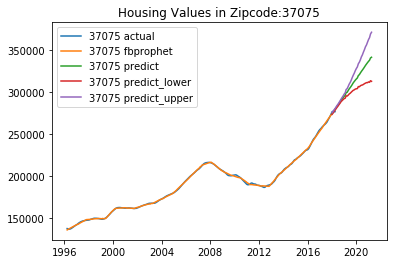

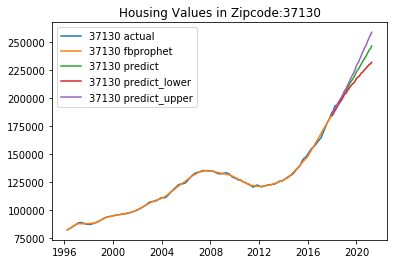

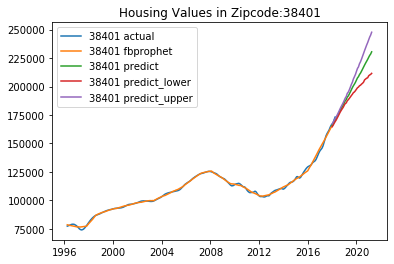

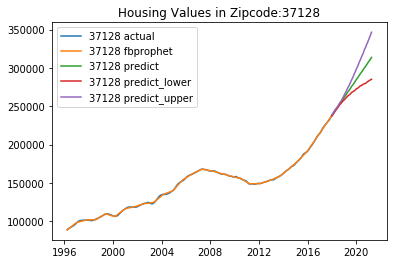

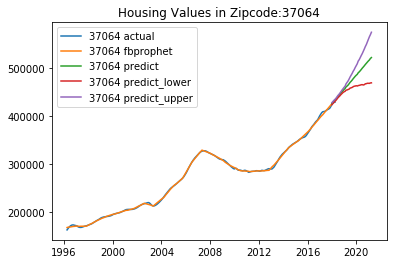

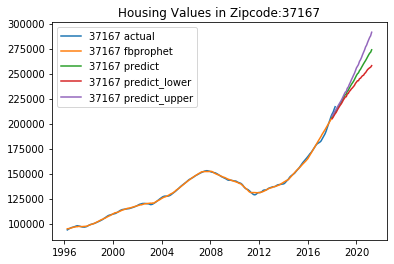

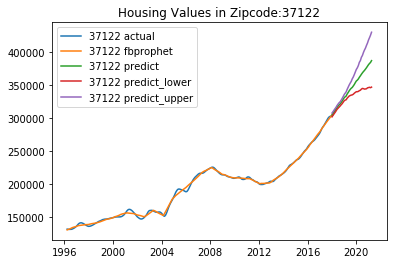

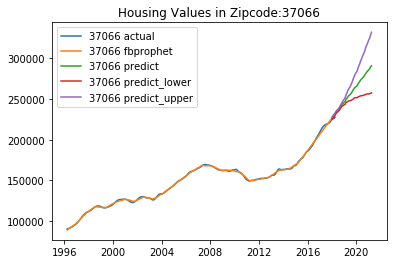

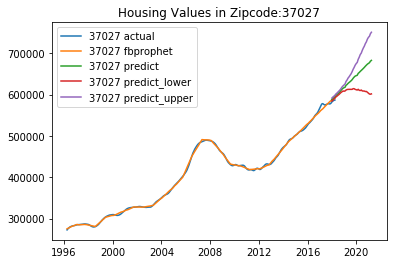

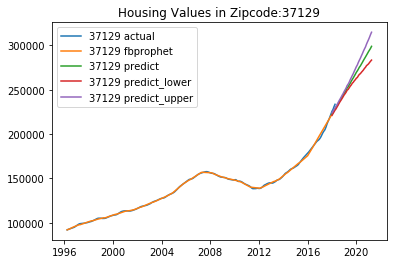

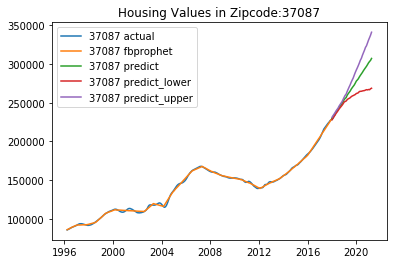

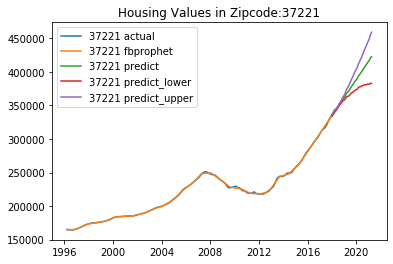

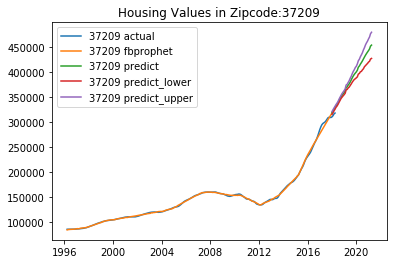

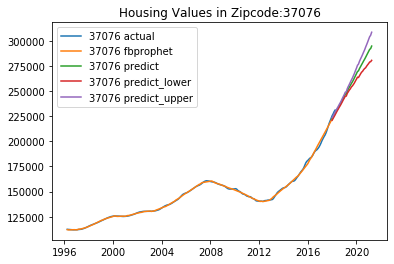

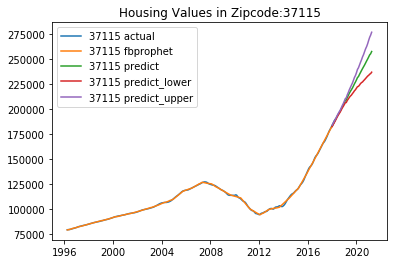

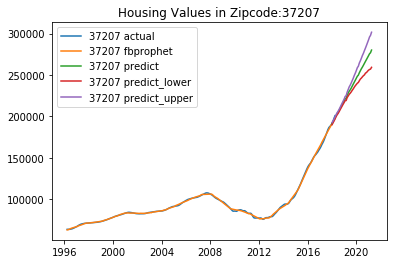

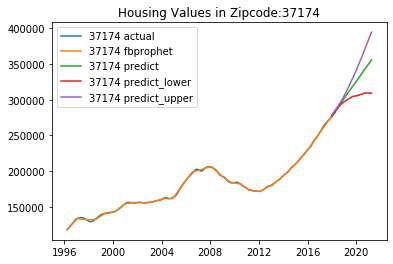

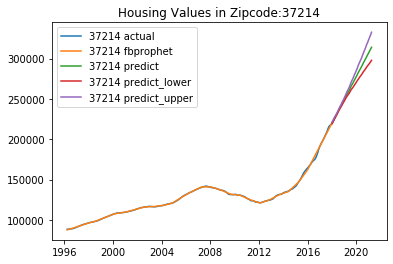

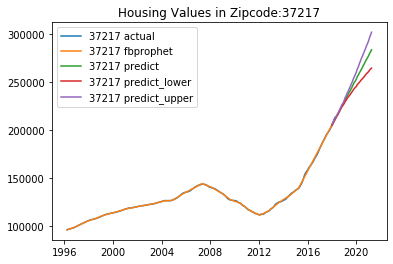

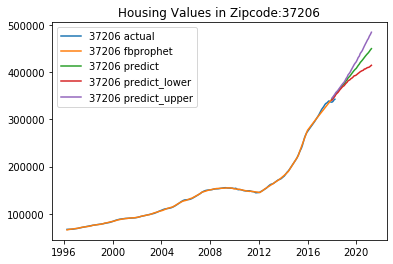

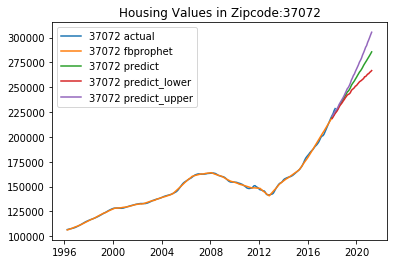

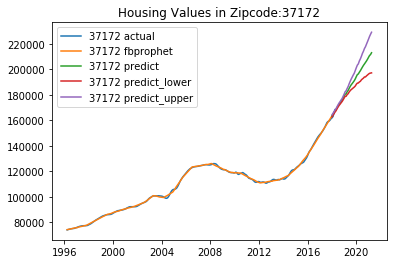

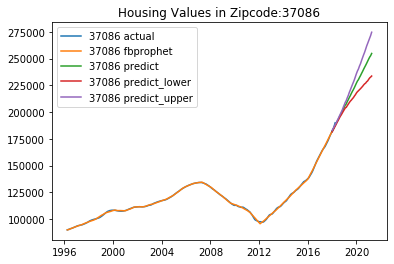

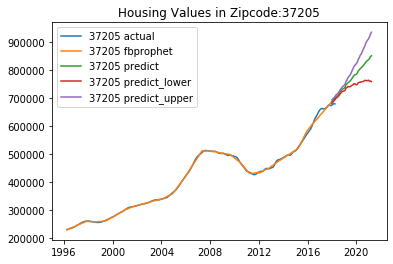

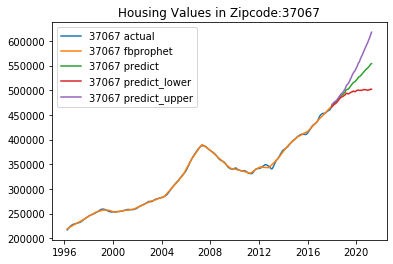

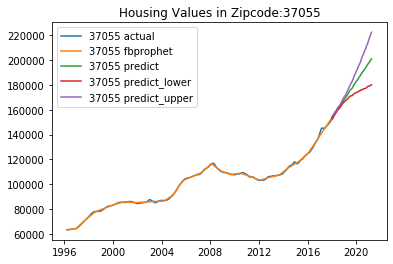

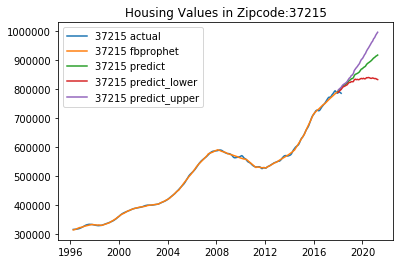

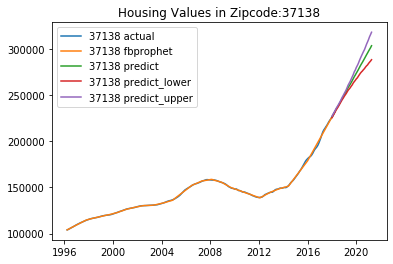

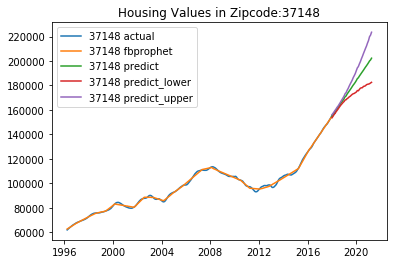

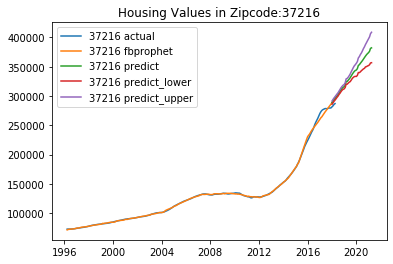

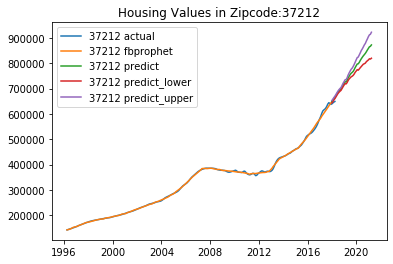

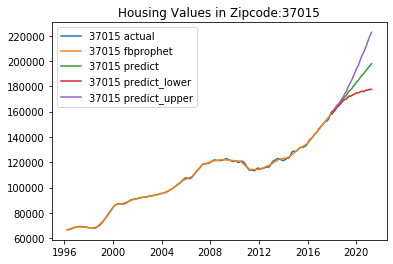

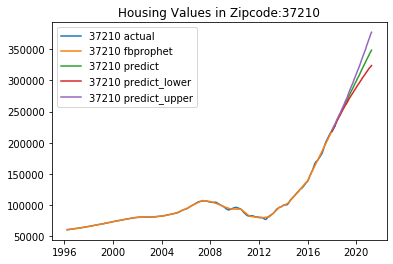

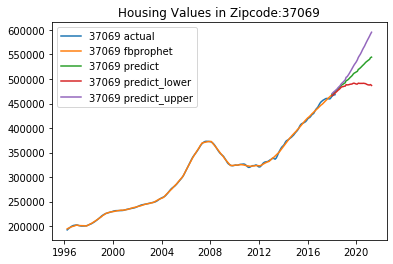

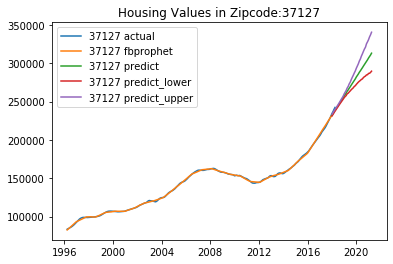

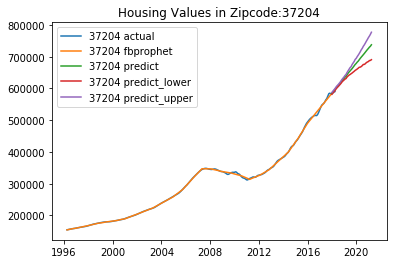

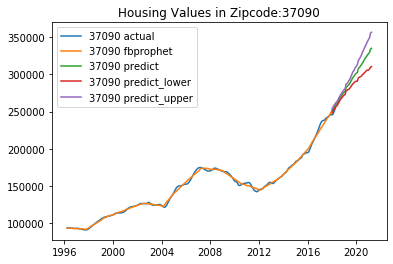

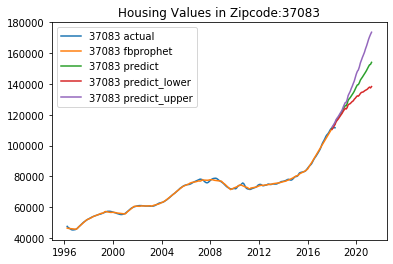

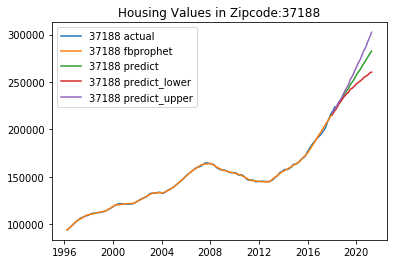

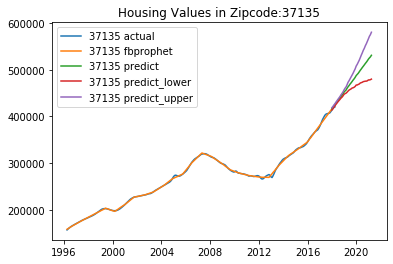

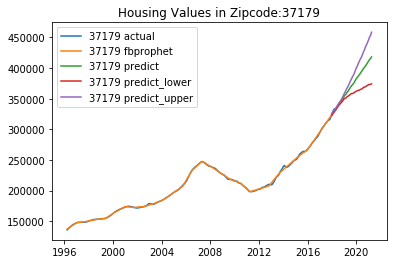

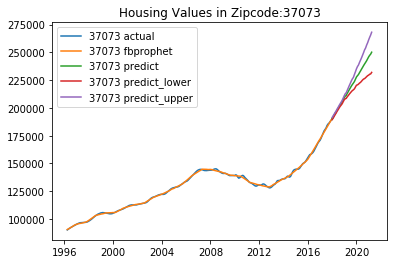

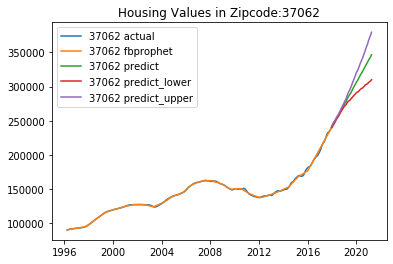

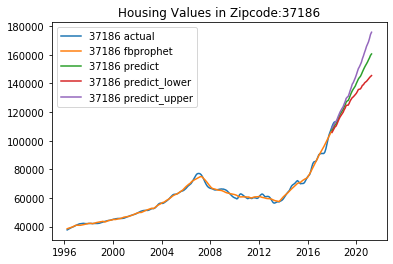

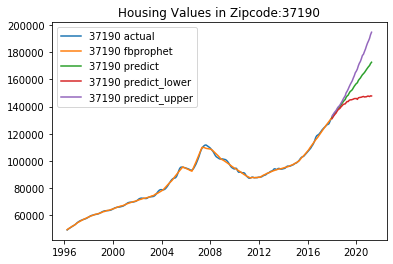

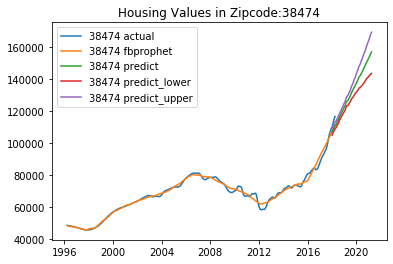

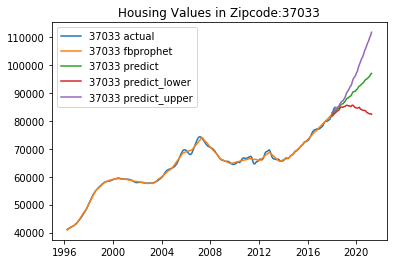

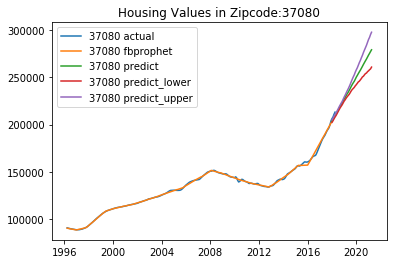

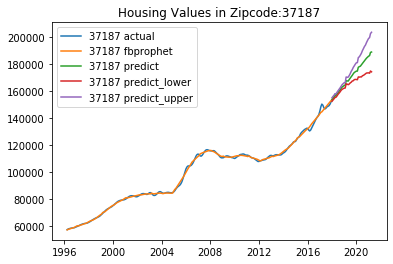

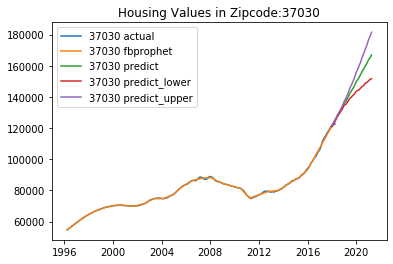

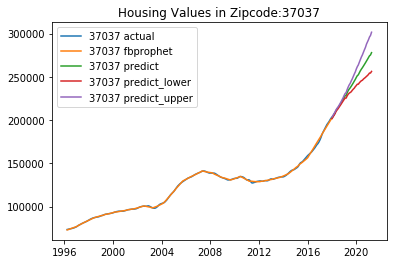

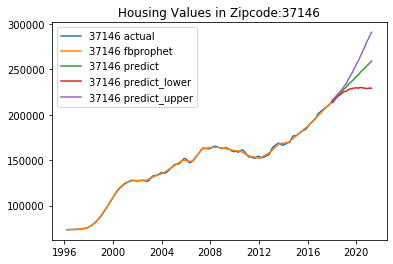

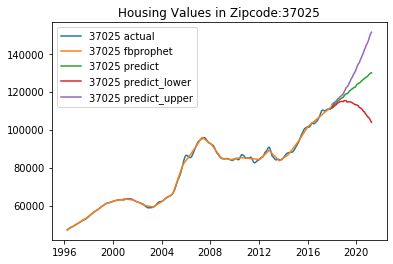

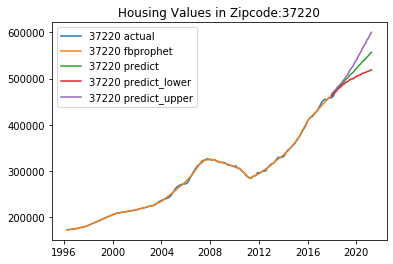

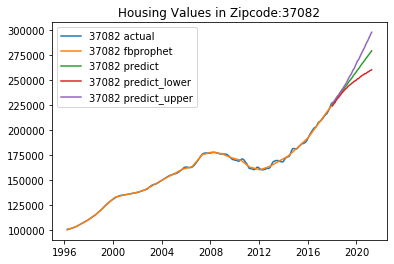

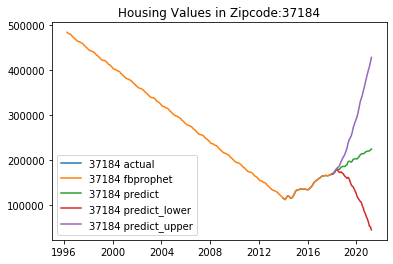

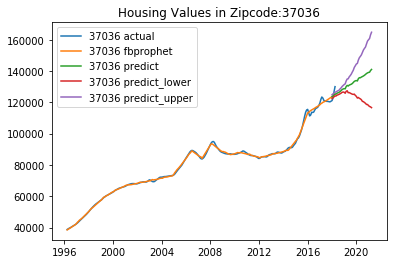

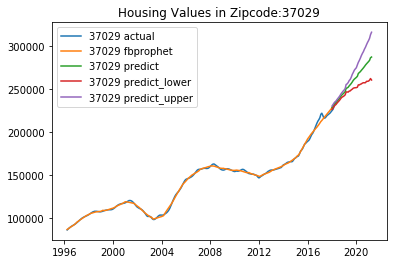

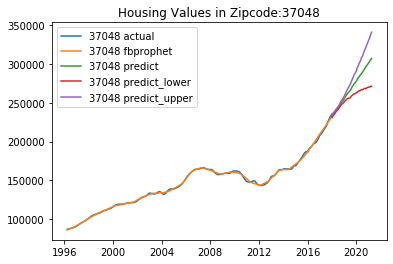

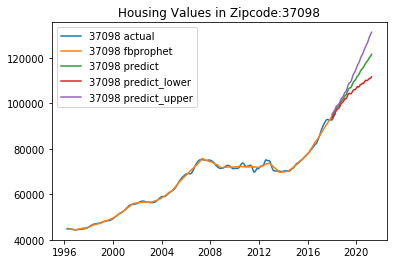

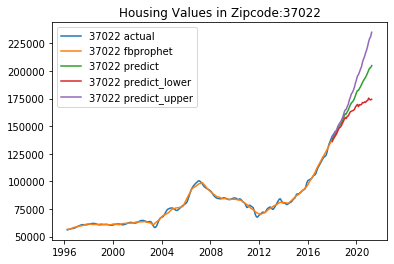

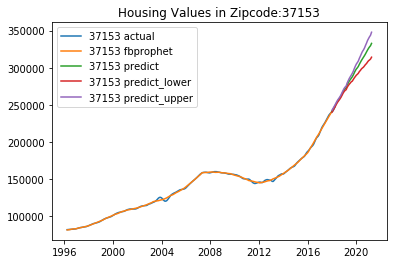

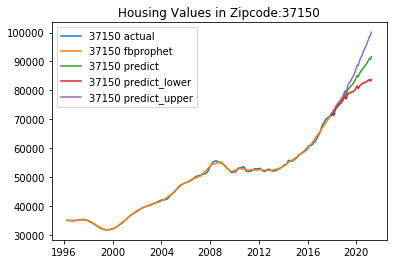

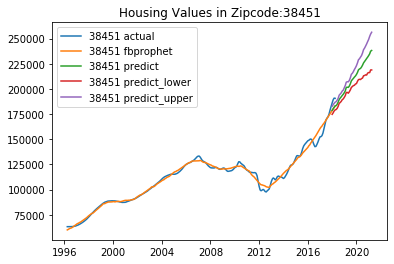

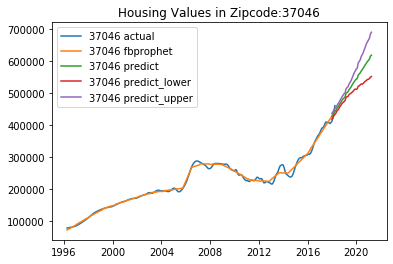

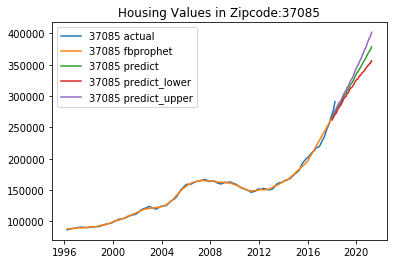

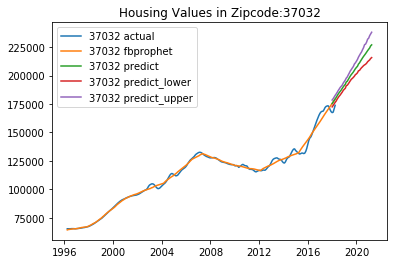

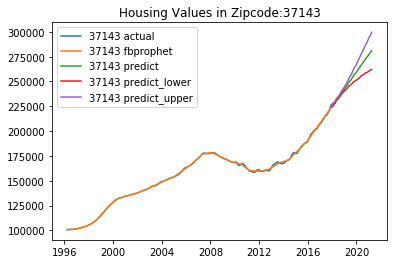

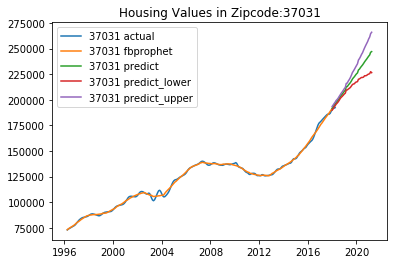

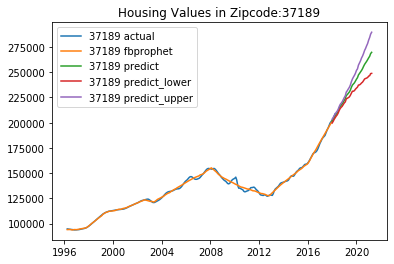

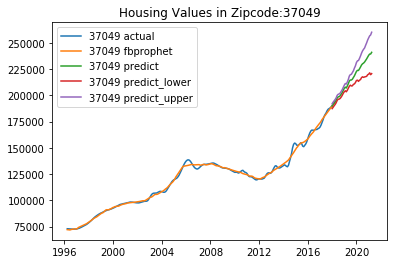

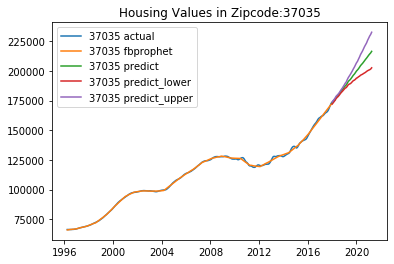

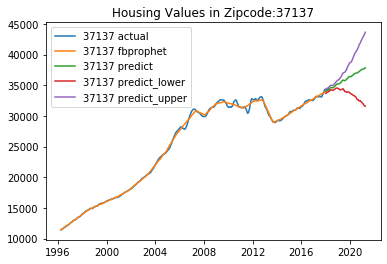

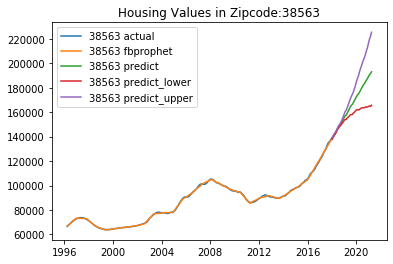

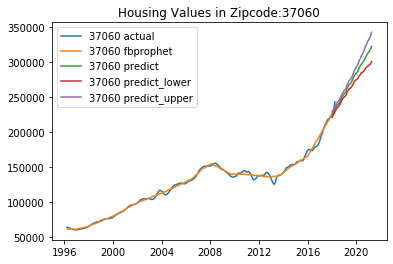

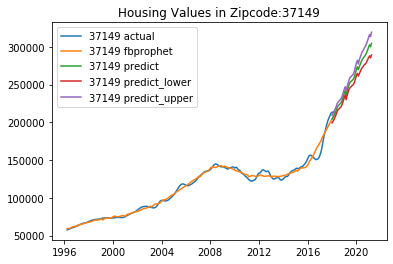

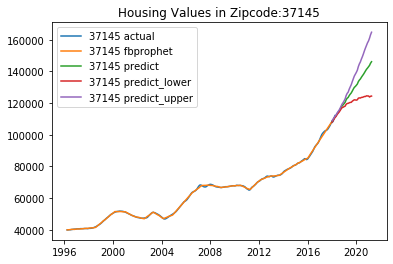

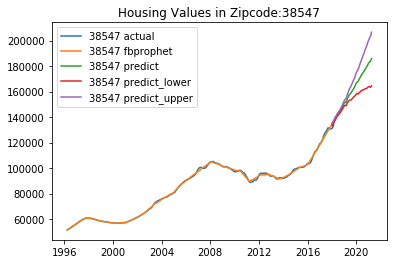

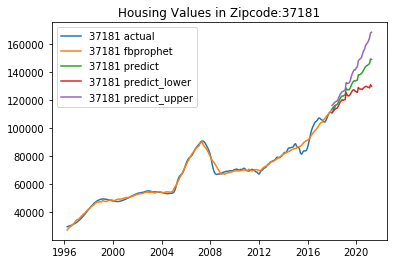

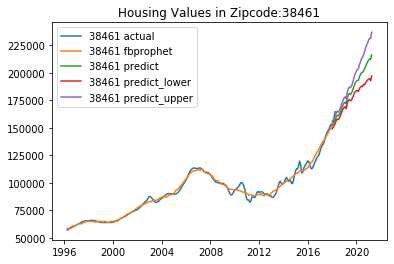

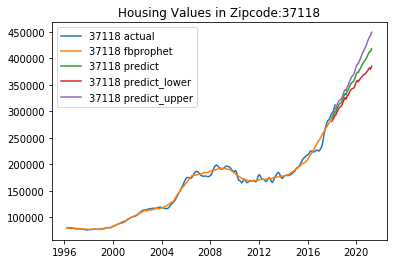

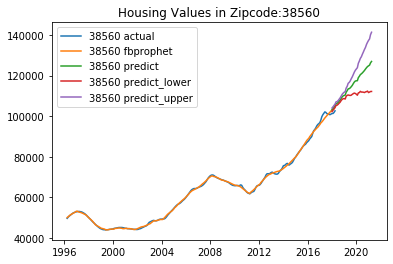

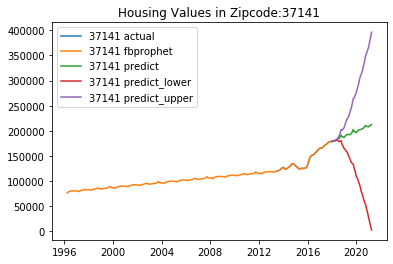

In [9]:
for zippy in zippies:
    
    plt.plot(df_actual[df_actual['Zip_code'] == zippy]['time'], 
             df_actual[df_actual['Zip_code'] == zippy]['value'], 
             label=f'{zippy} actual')

    plt.plot(df_actual[df_actual['Zip_code'] == zippy]['time'], 
             df_actual[df_actual['Zip_code'] == zippy]['yhat'], 
             label=f'{zippy} fbprophet')

    plt.plot(df_fut[df_fut['Zip_code'] == zippy]['ds'], 
             df_fut[df_fut['Zip_code'] == zippy]['yhat'], 
             label=f'{zippy} predict')

    plt.plot(df_fut[df_fut['Zip_code'] == zippy]['ds'], 
             df_fut[df_fut['Zip_code'] == zippy]['yhat_lower'], 
             label=f'{zippy} predict_lower')

    plt.plot(df_fut[df_fut['Zip_code'] == zippy]['ds'], 
             df_fut[df_fut['Zip_code'] == zippy]['yhat_upper'], 
             label=f'{zippy} predict_upper')
    
    plt.legend(loc='best')
    plt.title(f"Housing Values in Zipcode:{zippy}")
    
    plt.show()

In [10]:
metro_annual = metro_zips.resample("YS").mean()
metro_annual_pct = metro_annual.pct_change()
metro_annual_pct_diff = metro_annual.pct_change().diff()

In [11]:
metro_annual_pct.min().min(), metro_annual_pct.max().max()

(-0.20601546294550255, 0.3103564223268327)

In [12]:
metro_annual_pct.tail(3).T.sort_values('2018-01-01', ascending=False)

Date_index  2016-01-01  2017-01-01  2018-01-01
38474         0.108150    0.165130    0.170279
37085         0.123554    0.142835    0.161614
37186         0.161903    0.167473    0.159427
37118         0.099812    0.174354    0.153480
37149         0.082245    0.219015    0.142742
...                ...         ...         ...
37205         0.133655    0.090472    0.017948
37027         0.061960    0.060586    0.015747
37215         0.097431    0.063275    0.013195
38560         0.099751    0.093424    0.012858
37032         0.150318    0.117711   -0.002251

[85 rows x 3 columns]

In [13]:
metro_annual_pct_diff.min().min(), metro_annual_pct_diff.max().max()

(-0.30054590670195236, 0.28827548753862065)

In [14]:
metro_annual_pct_diff.tail(3).T.sort_values('2018-01-01', ascending=False)

Date_index  2016-01-01  2017-01-01  2018-01-01
37085         0.006649    0.019281    0.018780
38451        -0.087469    0.060963    0.013855
37033         0.008766   -0.017098    0.007174
38474         0.072978    0.056980    0.005148
37167         0.006372    0.005061    0.001886
...                ...         ...         ...
37216         0.020410   -0.104827   -0.106169
37212         0.036141    0.036474   -0.113969
37210         0.054378   -0.004232   -0.119210
37032         0.124102   -0.032606   -0.119963
37209         0.050885   -0.038070   -0.146065

[85 rows x 3 columns]

In [15]:
df_pred_wide = df_actual.pivot(index='time', columns='Zip_code',values='yhat')
df_fut_wide = df_fut.pivot(index='ds', columns='Zip_code',values='yhat')

In [16]:
fbproph = pd.concat([df_pred_wide.resample("YS").mean(), df_fut_wide.resample("YS").mean()], axis=0)
fb_pct_change = fbproph.pct_change()
fb_ann = fbproph.pct_change().diff()

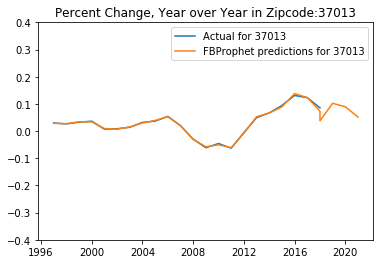

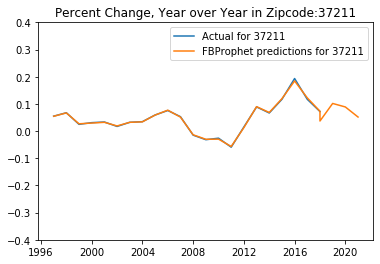

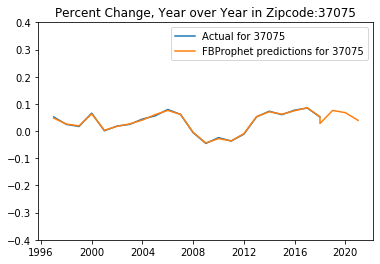

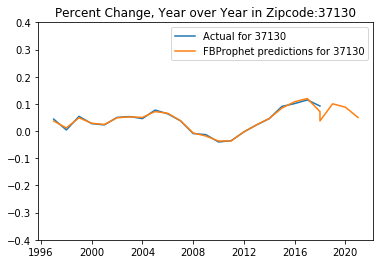

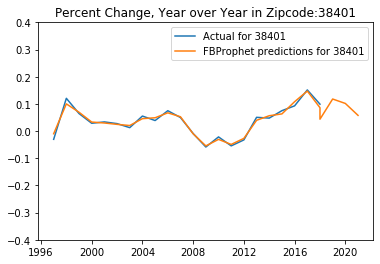

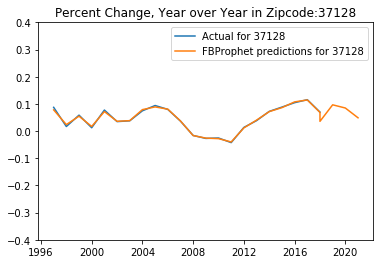

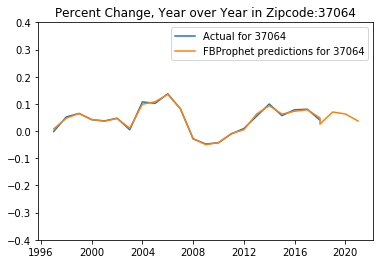

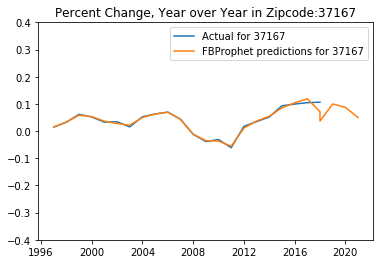

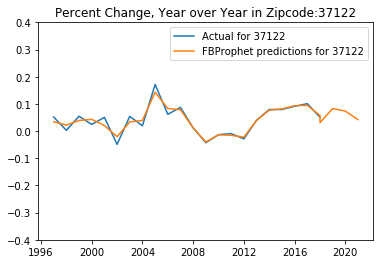

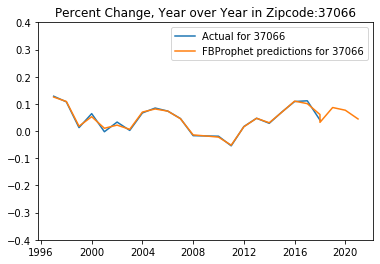

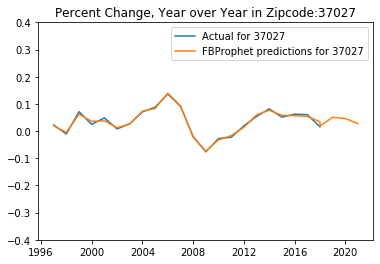

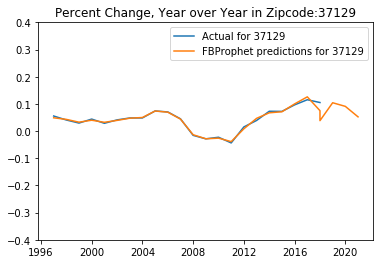

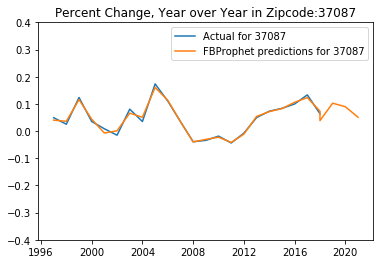

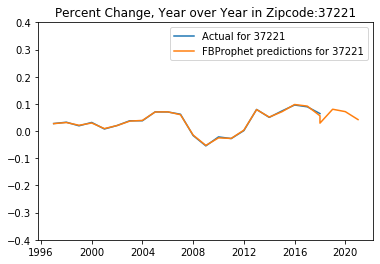

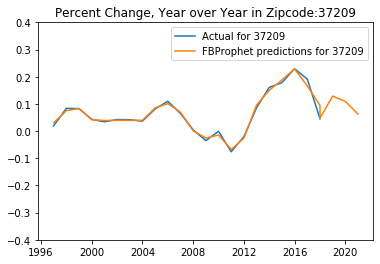

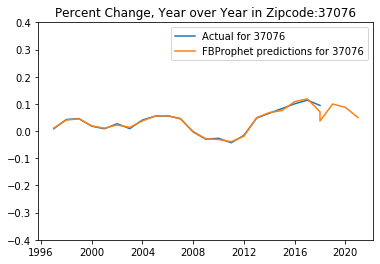

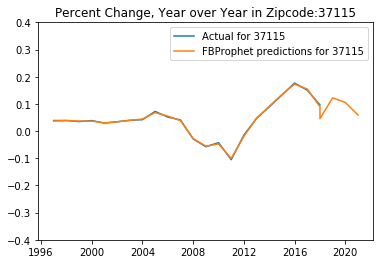

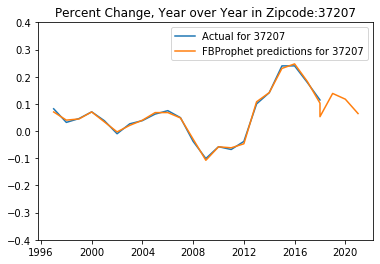

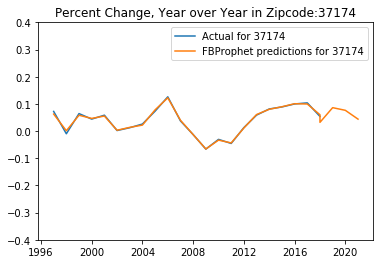

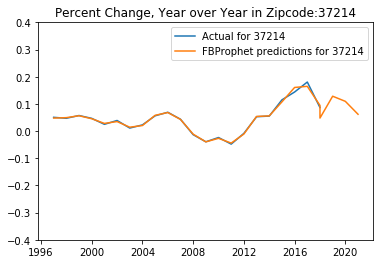

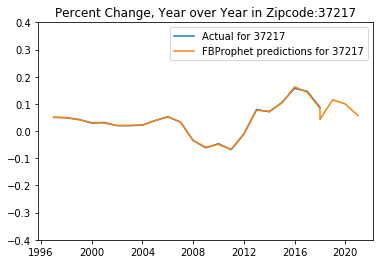

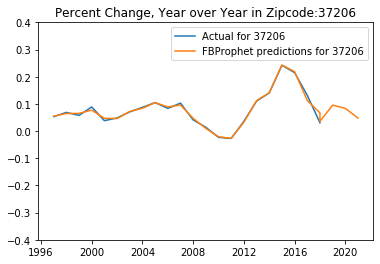

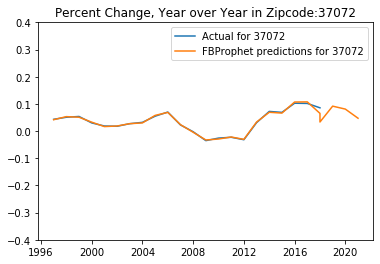

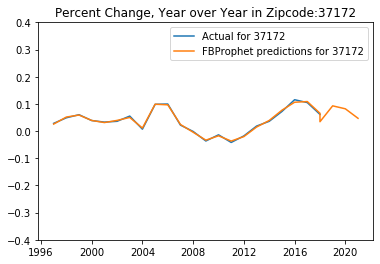

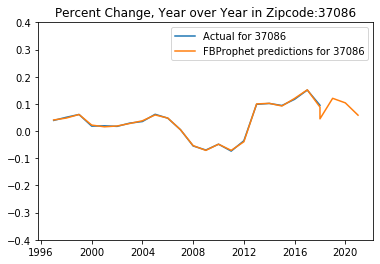

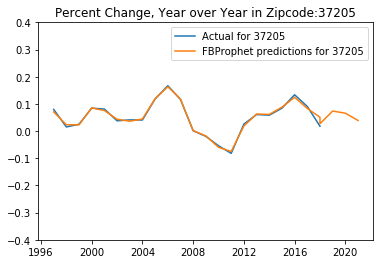

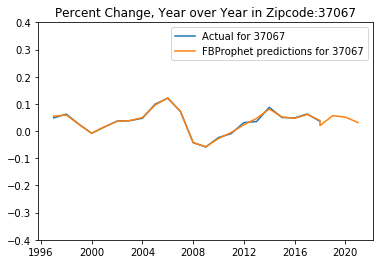

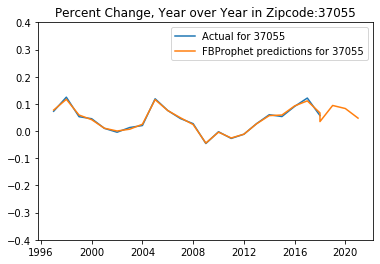

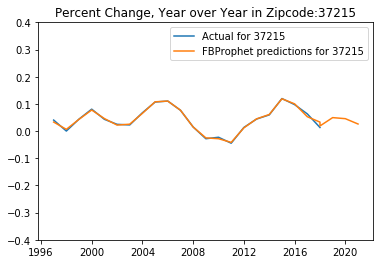

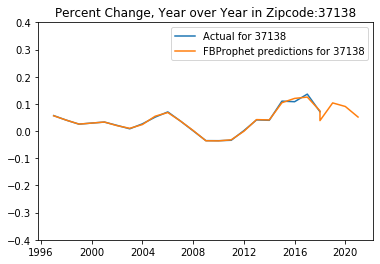

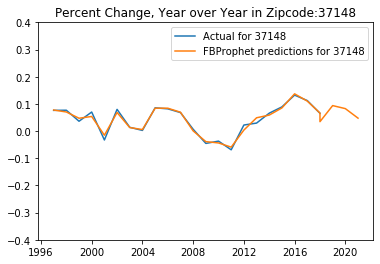

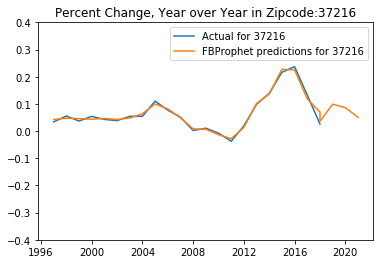

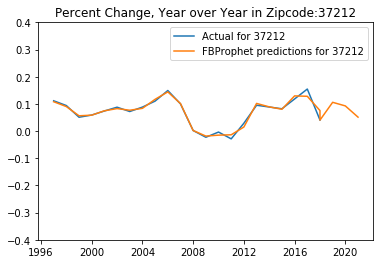

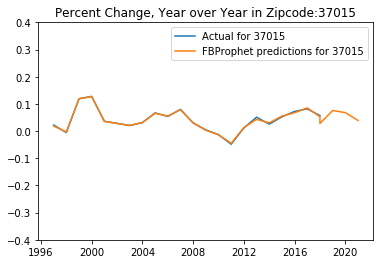

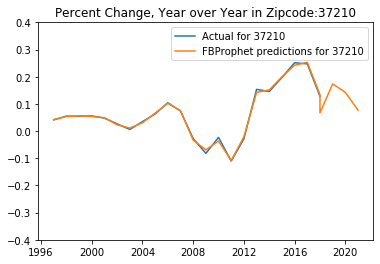

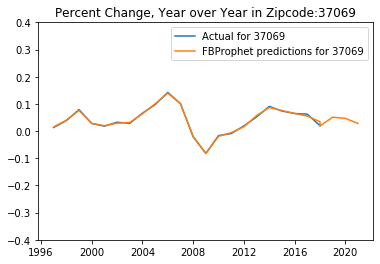

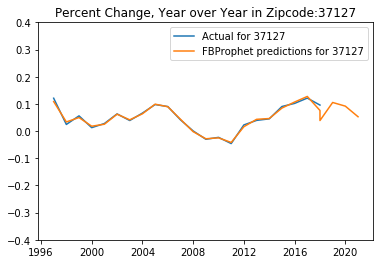

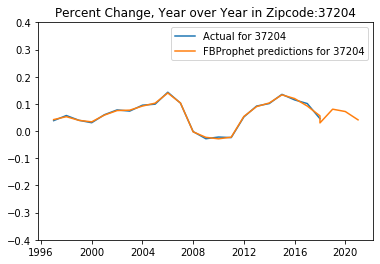

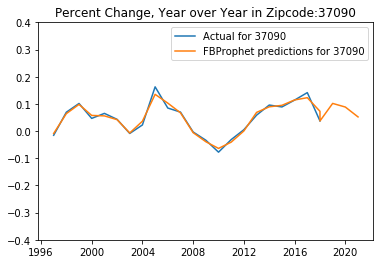

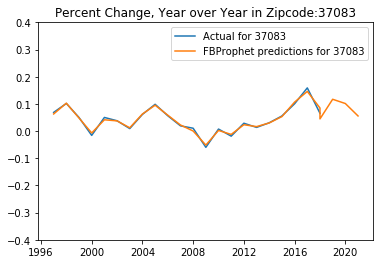

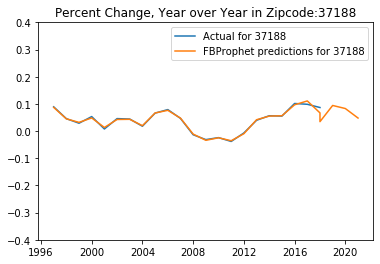

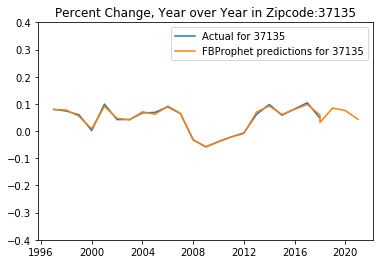

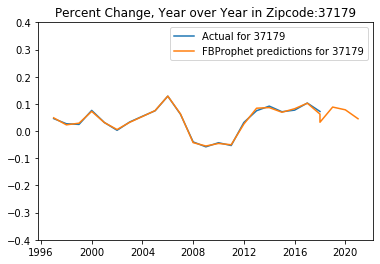

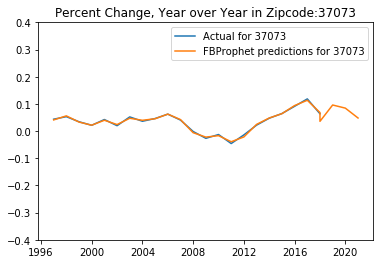

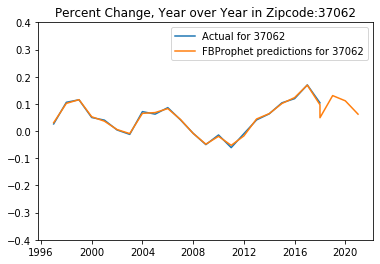

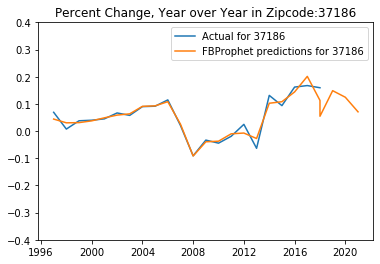

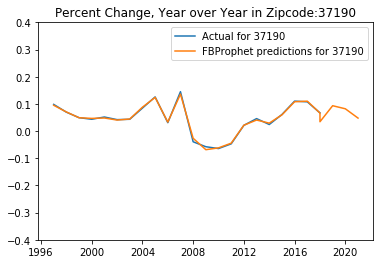

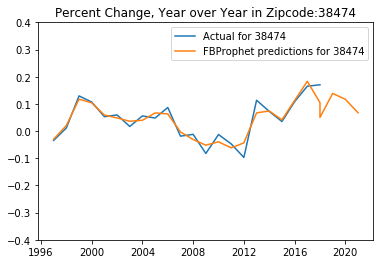

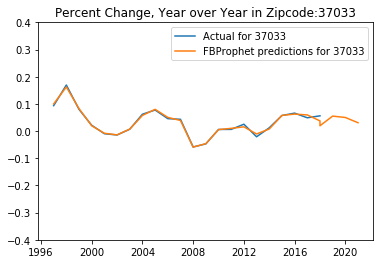

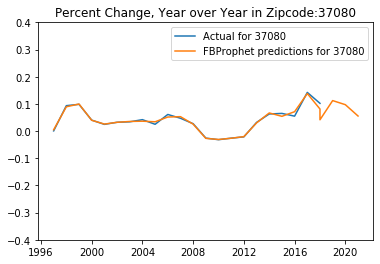

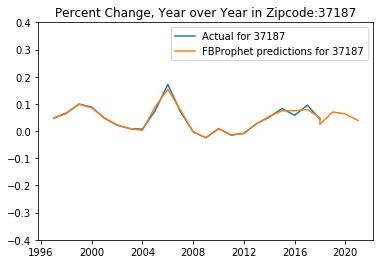

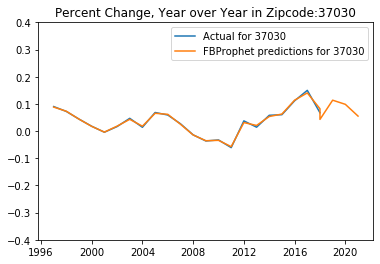

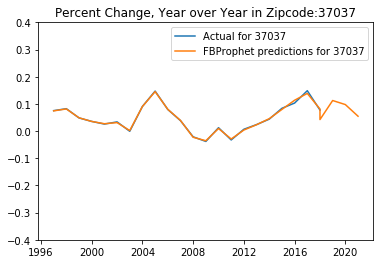

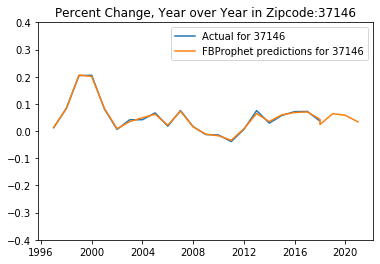

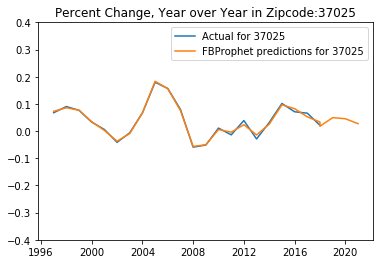

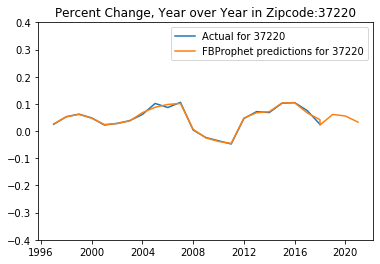

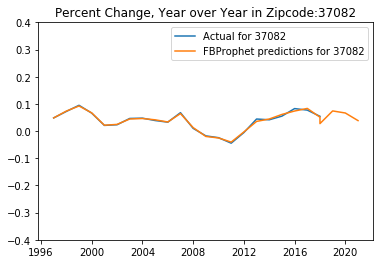

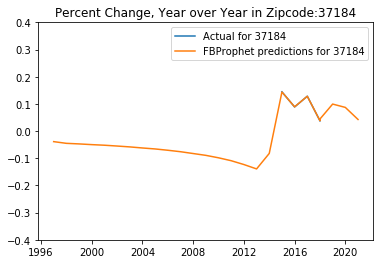

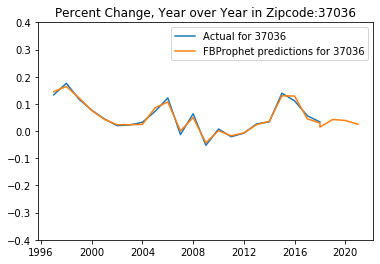

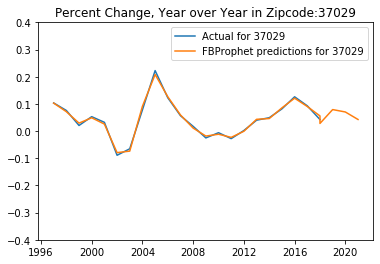

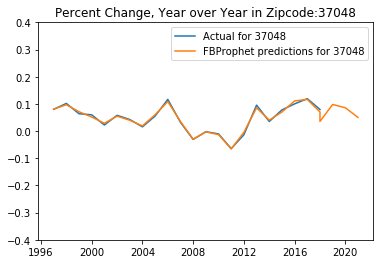

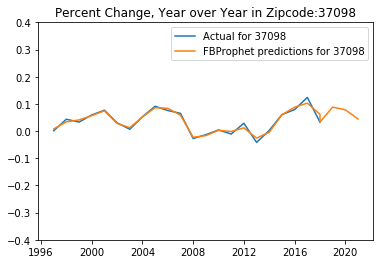

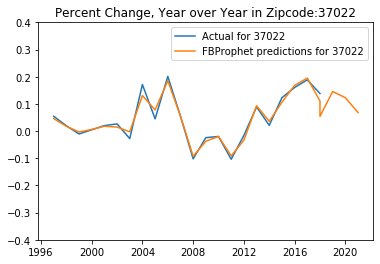

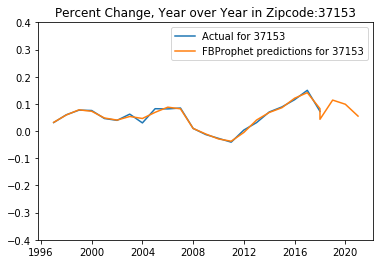

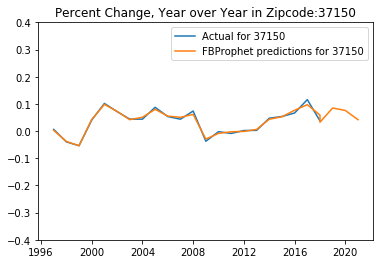

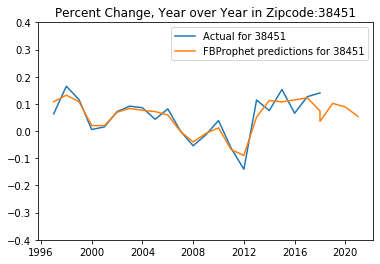

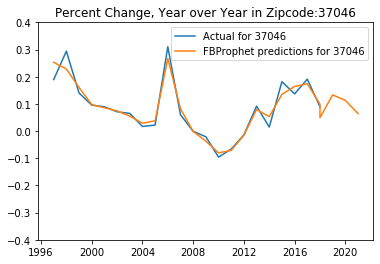

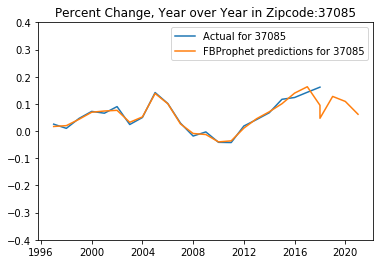

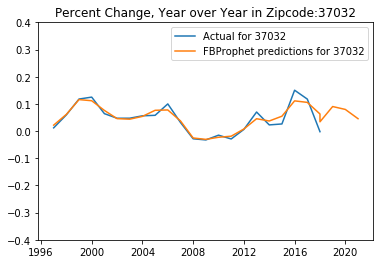

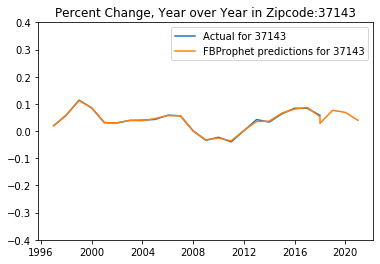

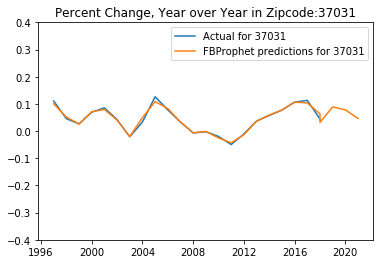

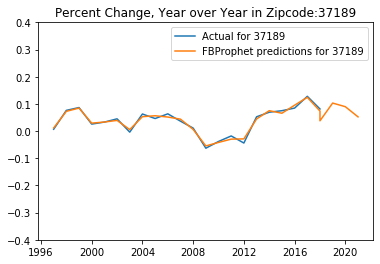

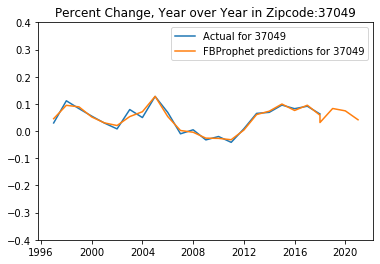

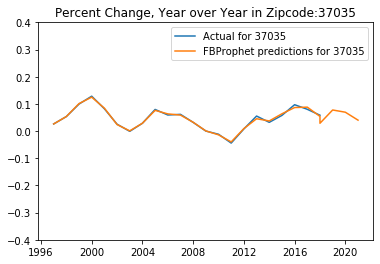

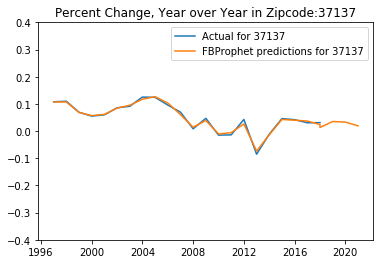

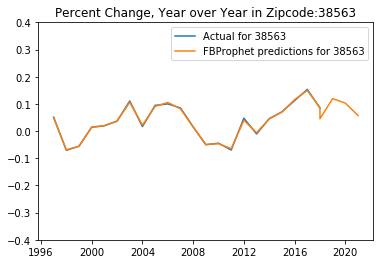

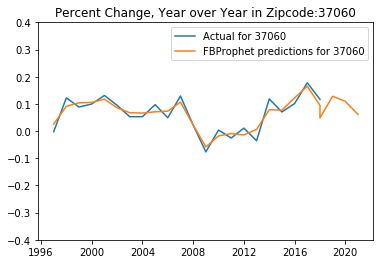

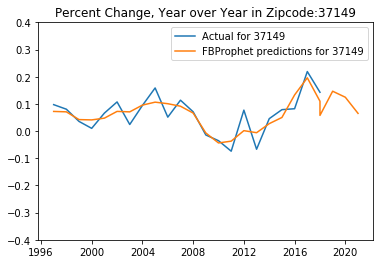

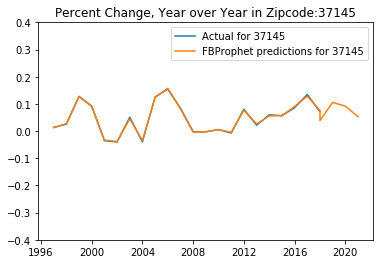

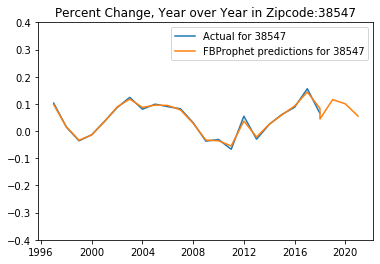

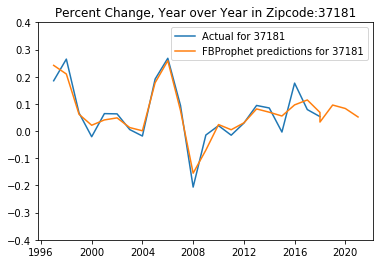

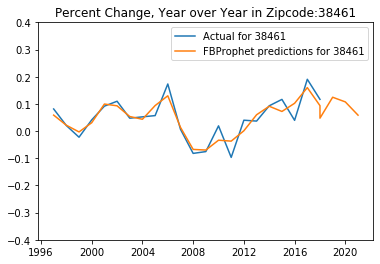

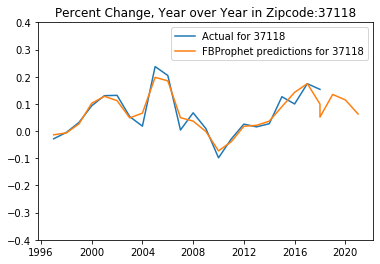

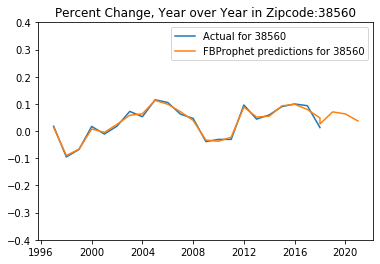

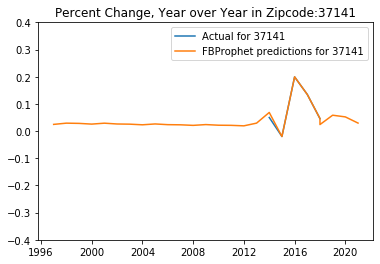

In [17]:
for zippy in zippies:
    
    plt.plot(metro_annual_pct.index, 
         metro_annual_pct[str(zippy)], 
         label=f'Actual for {zippy}')
    
    plt.plot(fb_pct_change.index, 
             fb_pct_change[zippy], 
             label=f'FBProphet predictions for {zippy}')

    plt.ylim(-0.4,0.4)
    plt.legend(loc='best')
    plt.title(f"Percent Change, Year over Year in Zipcode:{zippy}")
    
    plt.show()

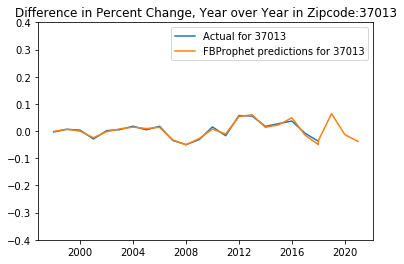

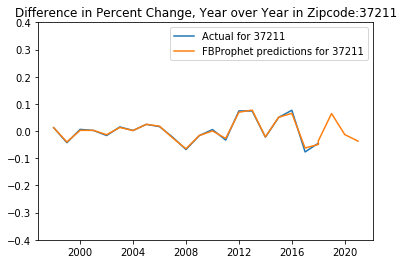

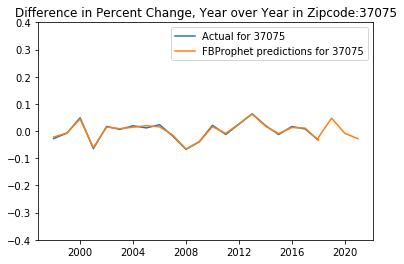

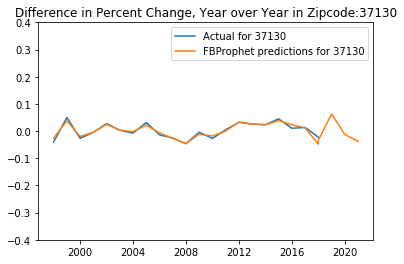

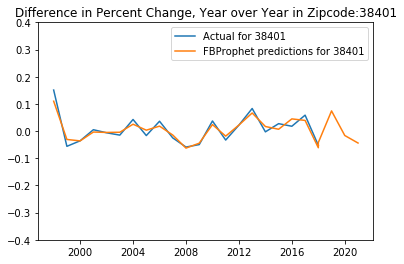

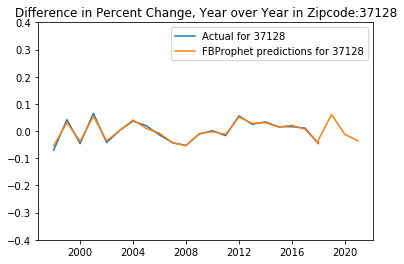

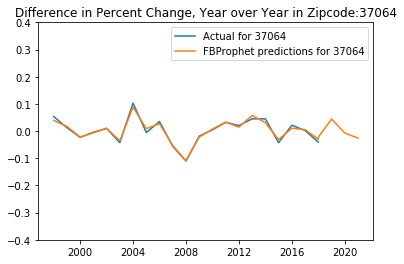

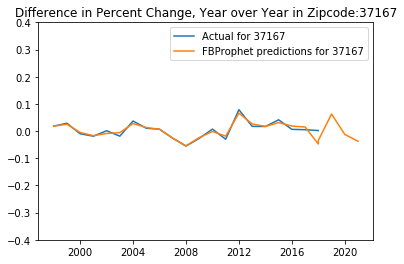

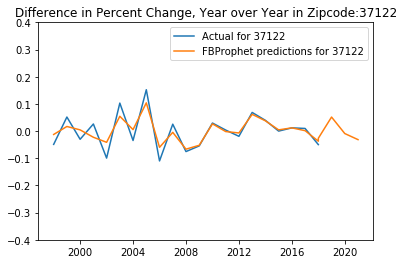

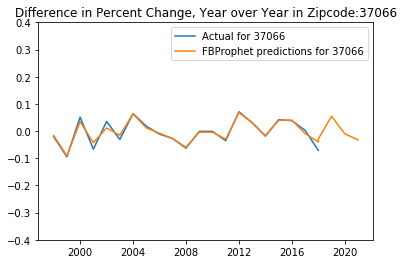

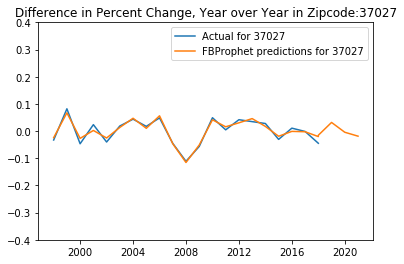

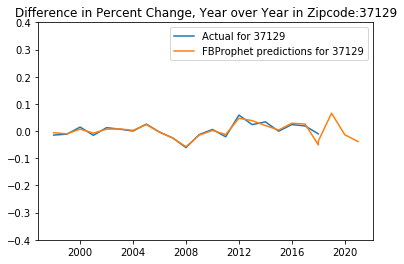

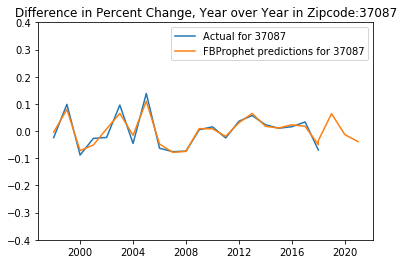

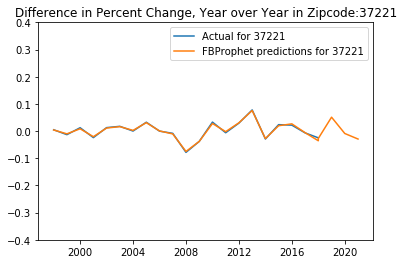

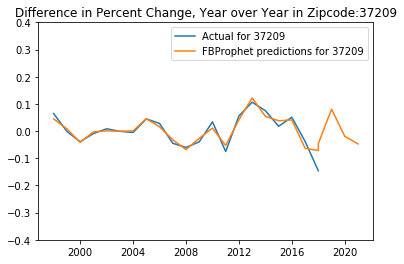

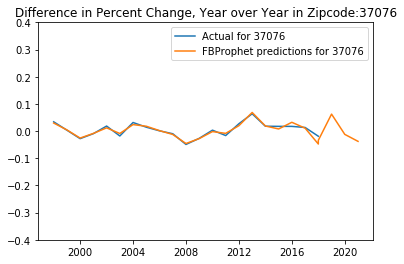

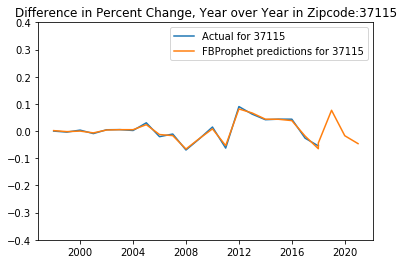

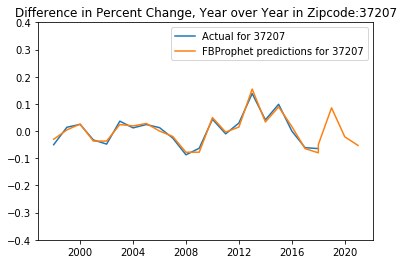

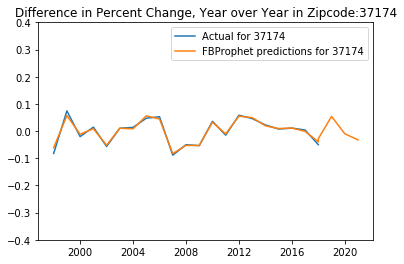

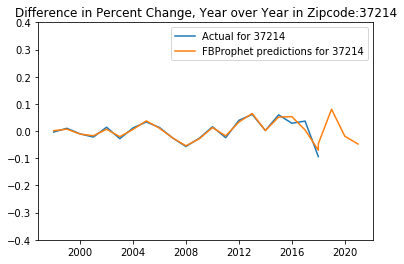

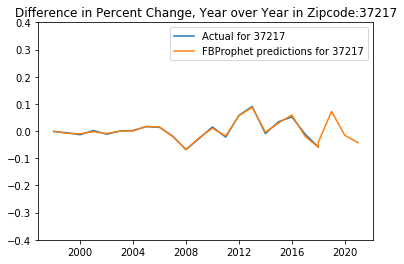

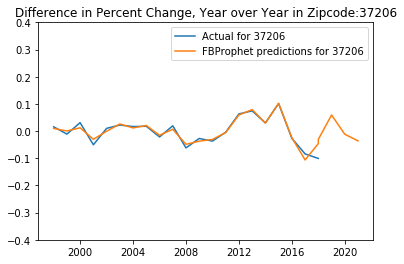

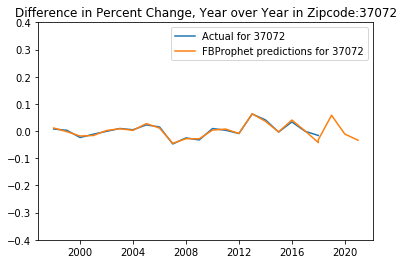

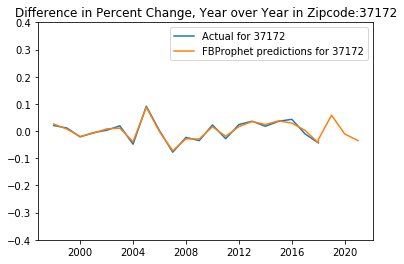

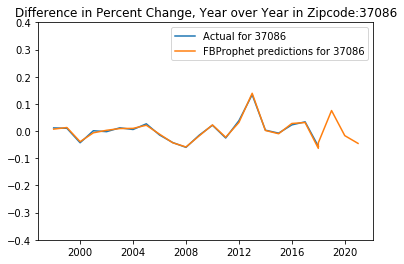

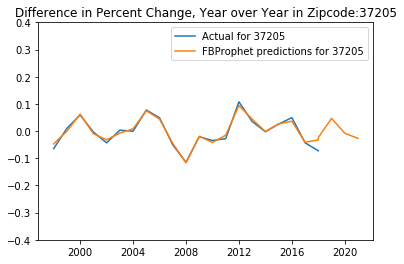

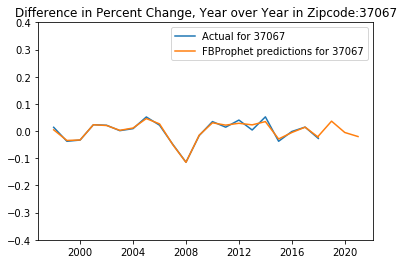

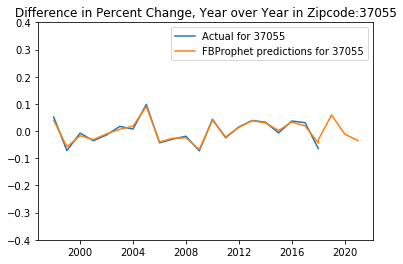

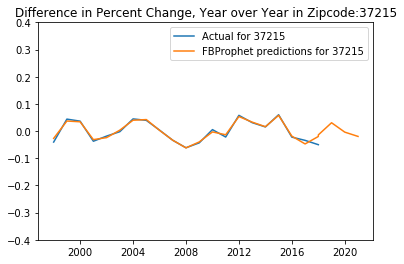

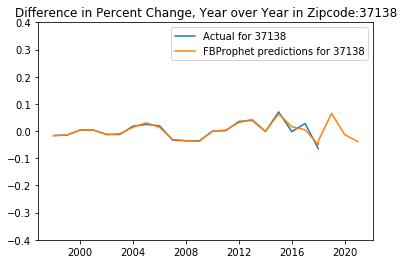

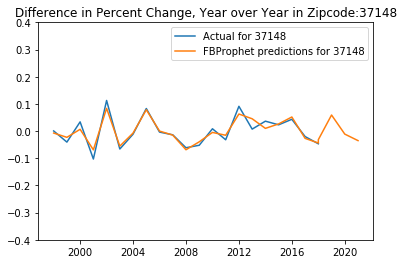

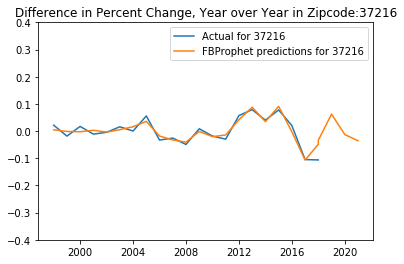

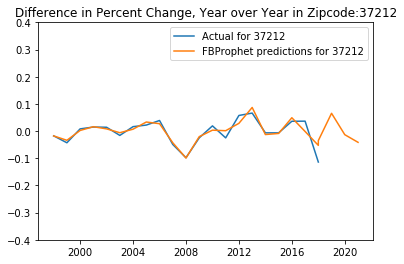

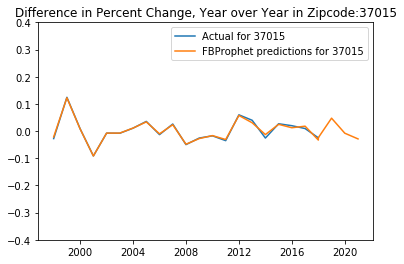

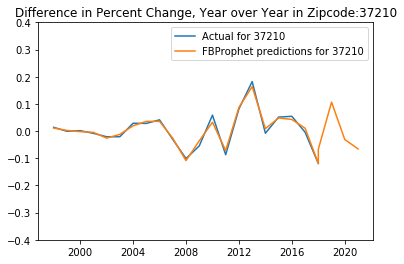

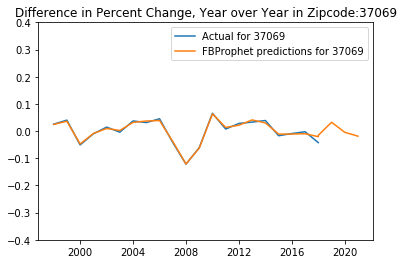

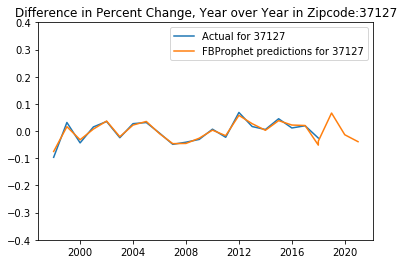

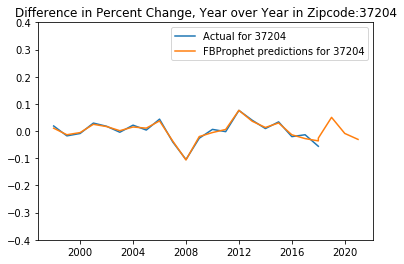

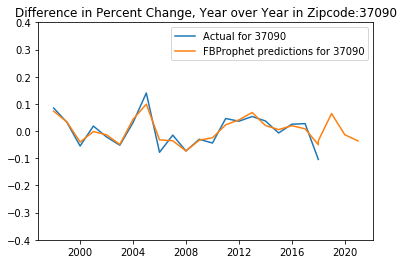

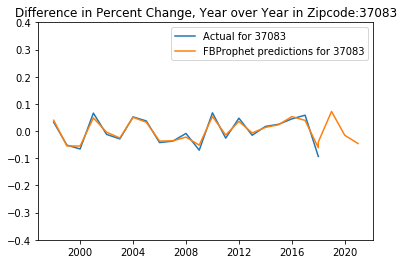

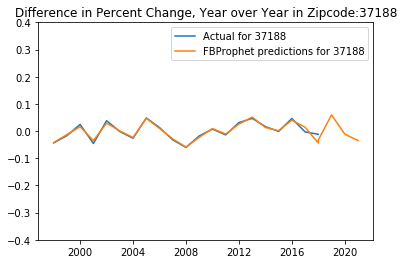

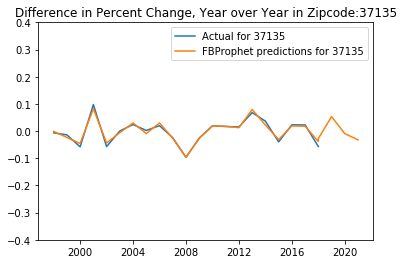

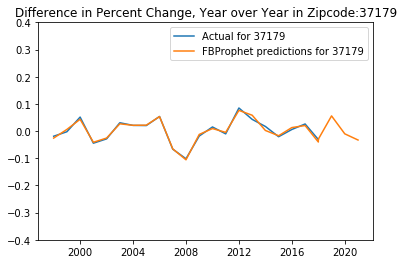

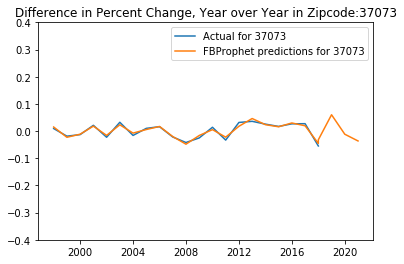

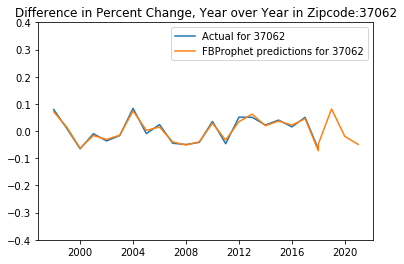

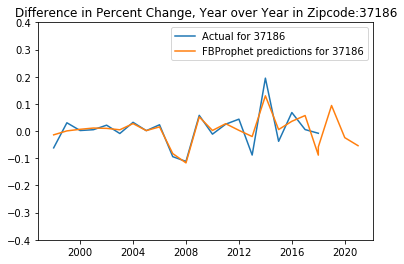

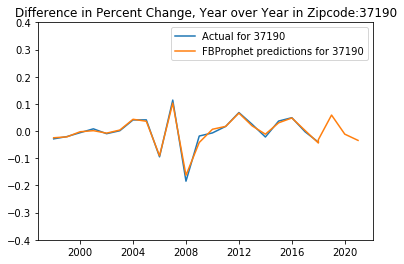

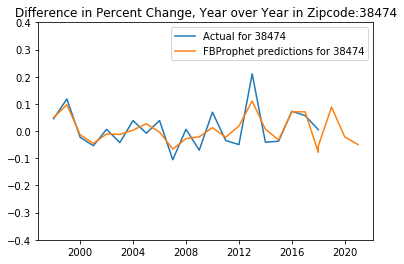

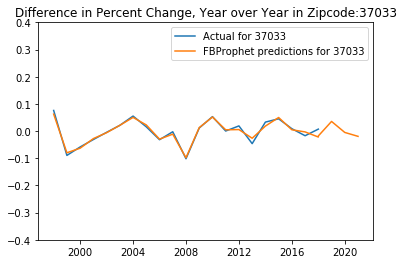

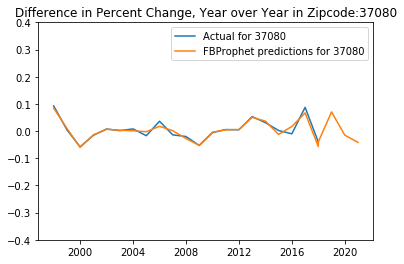

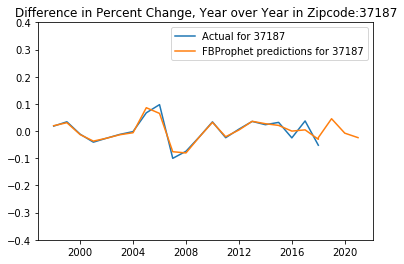

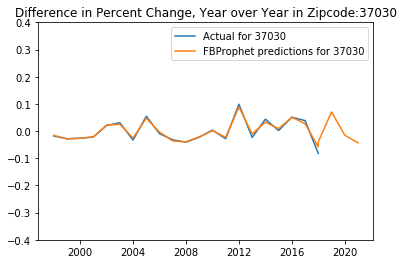

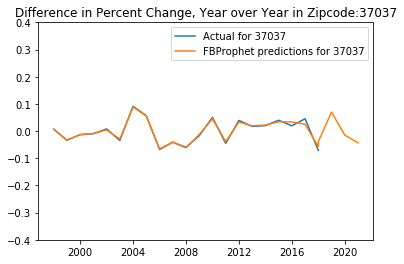

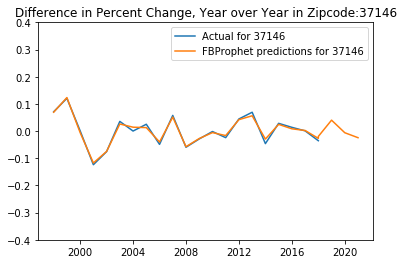

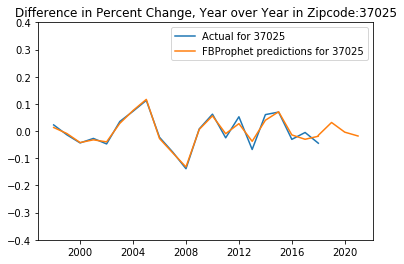

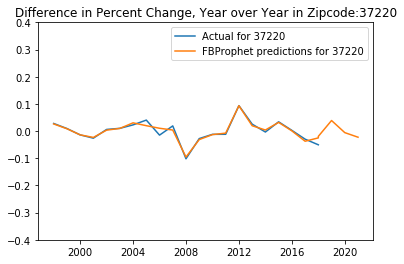

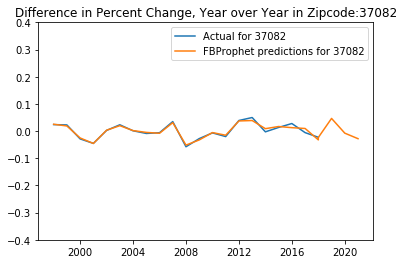

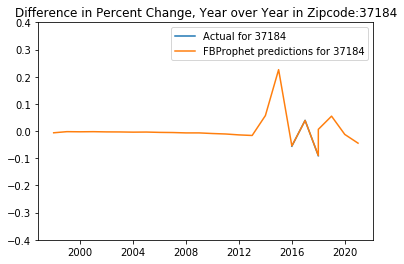

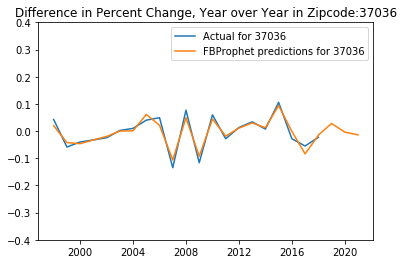

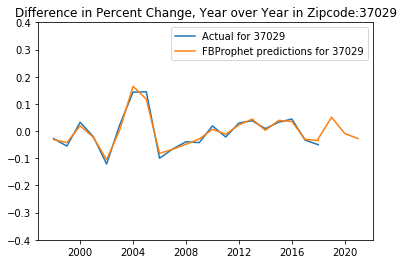

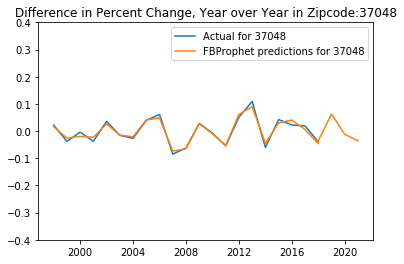

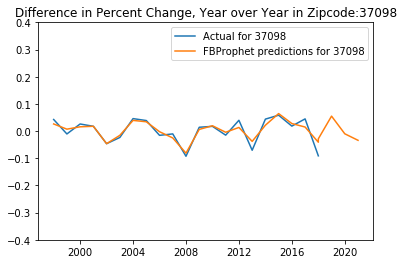

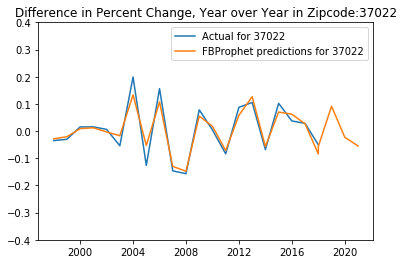

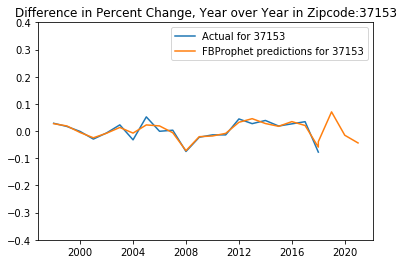

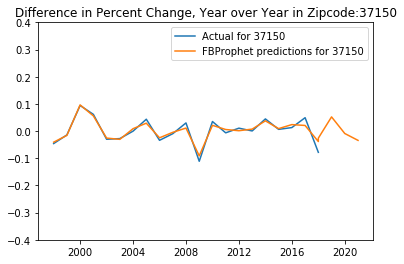

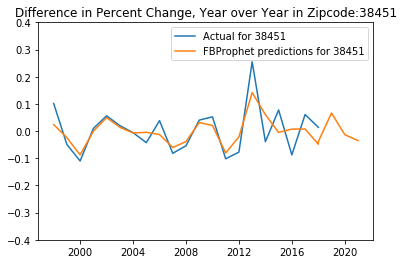

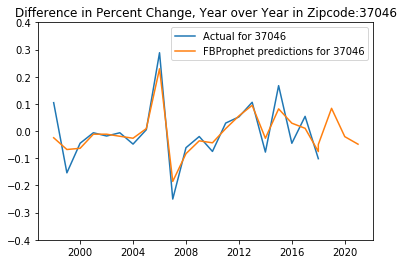

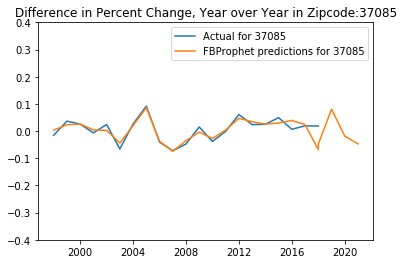

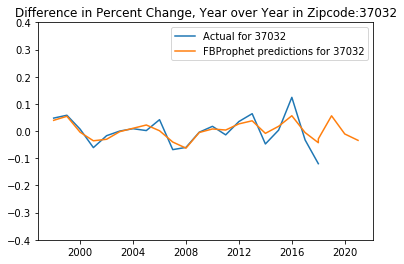

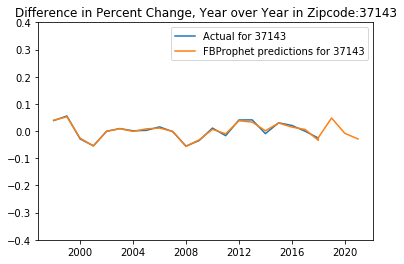

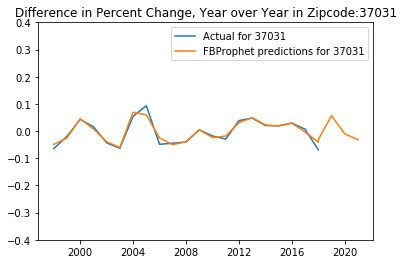

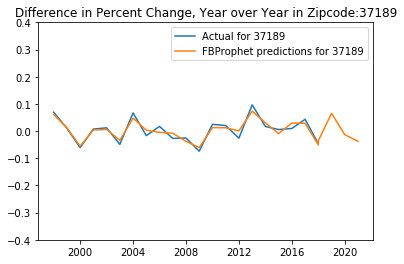

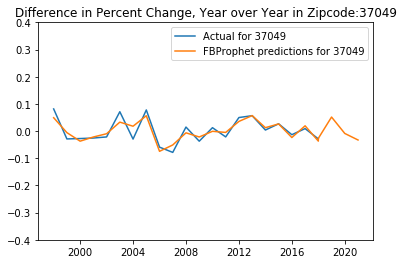

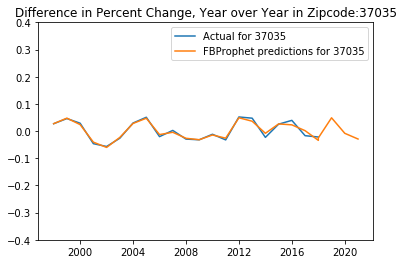

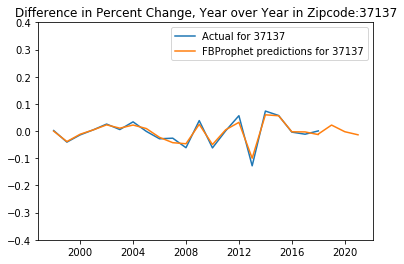

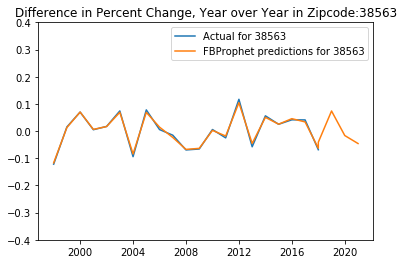

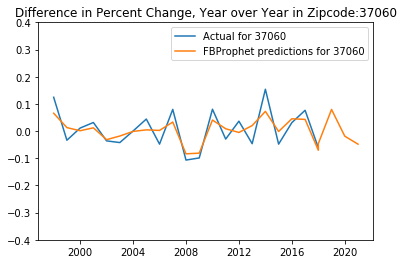

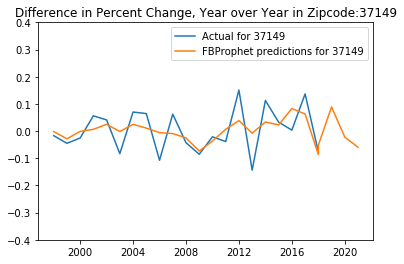

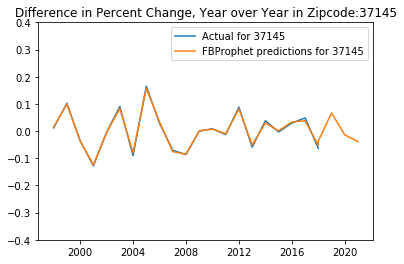

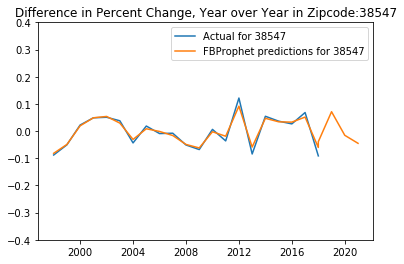

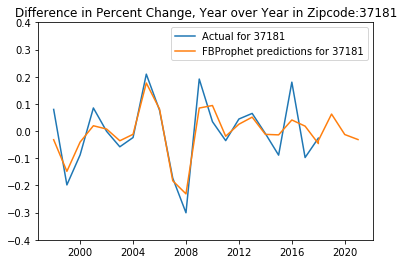

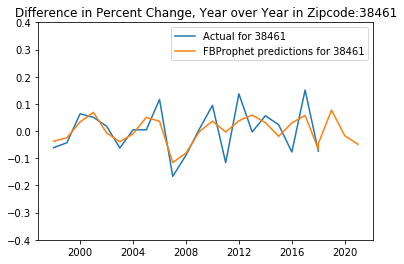

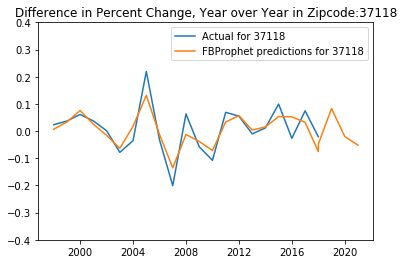

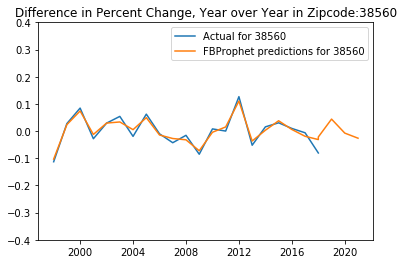

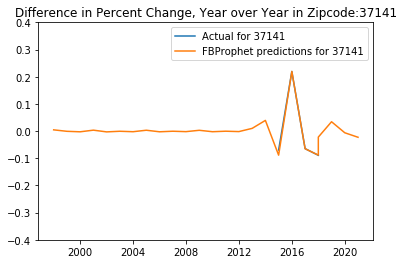

In [18]:
for zippy in zippies:
    
    plt.plot(metro_annual_pct_diff.index, 
         metro_annual_pct_diff[str(zippy)], 
         label=f'Actual for {zippy}')
    
    plt.plot(fb_ann.index, 
             fb_ann[zippy], 
             label=f'FBProphet predictions for {zippy}')
    
    plt.ylim(-0.4,0.4)
    plt.legend(loc='best')
    plt.title(f"Difference in Percent Change, Year over Year in Zipcode:{zippy}")
    
    plt.show()